[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ianjure/credit-card-fraud-detection/blob/main/Credit_Card_Fraud_Detection_Notebook.ipynb)

**Author:** Ian Jure Macalisang

**Email:** ianjuremacalisang2@gmail.com

**Link:** https://github.com/ianjure/credit-card-fraud-detection

**NOTE**: UPLOAD **[creditcard.csv](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)** FIRST!

# **I. Importing the Data**

In [ ]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# READING THE DATA

data = pd.read_csv('creditcard.csv')

# **II. Exploring the Data**

In [ ]:
# INSPECTING THE DATA [PART I]

print('HEAD:')
print(data.head(), '\n')

print('SHAPE:')
print(data.shape, '\n')

print('INFO:')
print(data.describe(), '\n')

print('NULL VALUES:')
print(data.isnull().sum(), '\n')

HEAD:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27     

In [ ]:
# INSPECTING THE DATA [PART II]

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
percentage = len(fraud)/float(len(valid))

print(f'Fraud / Valid Percentage: {percentage * 100 :.3f}%')
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Fraud / Valid Percentage: 0.173%
Fraud Cases: 492
Valid Transactions: 284315


Only **0.173%** fraudulent transaction out all the transactions. The data is **highly unbalanced**.

In [ ]:
# FRAUD AMOUNT INFO

print('FRAUD INFO:')
print(fraud.Amount.describe())

FRAUD INFO:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [ ]:
# VALID AMOUNT INFO

print('VALID INFO:')
print(valid.Amount.describe())

VALID INFO:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# **III. Visualizing the Data**

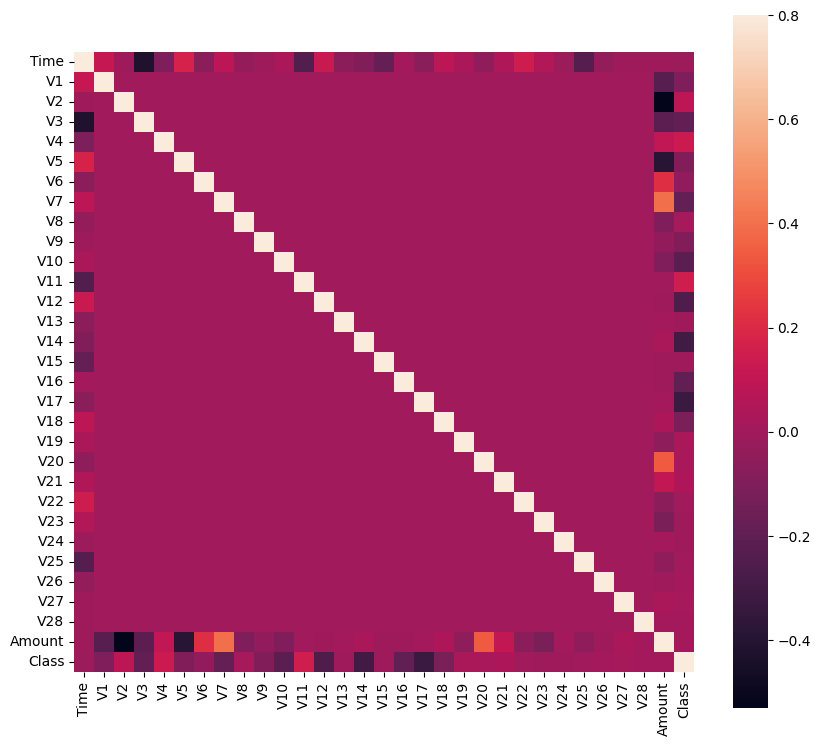

In [ ]:
# CORRELATION MATRIX

corrmat = data.corr()
fig = plt.figure(figsize = (10, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# **IV. Training the Models**

In [47]:
# IMPORTING TOOLS FOR MODEL EVALUATIONS

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

In [ ]:
# DIVIDING THE FEATURES (X) AND THE TARGET (Y) FROM THE DATASET

X = data.drop(['Class','Time'], axis = 1)
Y = data["Class"]
print('FEATURES (X): ', X.shape)
print('TARGET (Y): ', Y.shape)

# GETTING JUST THE VALUES FOR THE SAKE OF PROCESSING (NUMPY ARRAY WITH NO COLUMNS)

xData = X.values
yData = Y.values

FEATURES (X):  (284807, 29)
TARGET (Y):  (284807,)


In [ ]:
# SPLITTING THE DATA INTRO TRAINING AND TESTING SETS

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(227845, 29) (56962, 29) (227845,) (56962,)


## **A. Random Forest Classifier**

> Random Forest is a commonly-used machine learning algorithm, trademarked by Leo Breiman and Adele Cutler, that combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [ ]:
# USING RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1)
rfc.fit(xTrain, yTrain)

In [ ]:
# PREDICTION

rfc_yPred = rfc.predict(xTest)

In [ ]:
# EVALUATING THE MODEL

print('RANDOM FOREST CLASSIFIER \n')

rfc_errors = (rfc_yPred != yTest).sum()
print(f'Total Errors: {rfc_errors}')

rfc_acc = accuracy_score(yTest, rfc_yPred)
print(f"Accuracy: {rfc_acc}")

rfc_prec = precision_score(yTest, rfc_yPred)
print(f'Precision: {rfc_prec}')

rfc_rec = recall_score(yTest, rfc_yPred)
print(f'Recall: {rfc_rec}')

rfc_f1 = f1_score(yTest, rfc_yPred)
print(f'F1-Score: {rfc_f1}')

rfc_mcc = matthews_corrcoef(yTest, rfc_yPred)
print(f'Matthews Correlation Coefficient: {rfc_mcc}')

RANDOM FOREST CLASSIFIER 

Total Errors: 24
Accuracy: 0.9995786664794073
Precision: 0.9625
Recall: 0.7857142857142857
F1-Score: 0.8651685393258427
Matthews Correlation Coefficient: 0.8694303688259544


## **B. Bernoulli Naive Bayes Classifier**

> Naive Bayes are simple probabilistic classifiers that apply Bayes' theorem. This theorem is based on the probability of a hypothesis, given the data and some prior knowledge.

> Like MultinomialNB, this classifier is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed for binary/boolean features.



In [ ]:
# USING BERNOULLI NAIVE BAYES

from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(xTrain, yTrain)

In [ ]:
# PREDICTION

bnb_yPred = bnb.predict(xTest)

In [50]:
# EVALUATING THE MODEL

print('BERNOULLI NAIVE BAYES CLASSIFIER\n')

bnb_errors = (bnb_yPred != yTest).sum()
print(f'Total Errors: {bnb_errors}')

bnb_acc = accuracy_score(yTest, bnb_yPred)
print(f"Accuracy: {bnb_acc}")

bnb_prec = precision_score(yTest, bnb_yPred)
print(f'Precision: {bnb_prec}')

bnb_rec = recall_score(yTest, bnb_yPred)
print(f'Recall: {bnb_rec}')

bnb_f1 = f1_score(yTest, bnb_yPred)
print(f'F1-Score: {bnb_f1}')

bnb_mcc = matthews_corrcoef(yTest, bnb_yPred)
print(f'Matthews Correlation Coefficient: {bnb_mcc}')

BERNOULLI NAIVE BAYES CLASSIFIER

Total Errors: 51
Accuracy: 0.9991046662687406
Precision: 0.8051948051948052
Recall: 0.6326530612244898
F1-Score: 0.7085714285714286
Matthews Correlation Coefficient: 0.7132996194053766


## **C. Decision Tree Classifier**

> A Decision Tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered.

In [ ]:
# USING DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(xTrain, yTrain)

In [ ]:
# PREDICTION

dtc_yPred = dtc.predict(xTest)

In [ ]:
# EVALUATING THE MODEL

print('DECISION TREE CLASSIFIER \n')

dtc_errors = (dtc_yPred != yTest).sum()
print(f'Total Errors: {dtc_errors}')

dtc_acc = accuracy_score(yTest, dtc_yPred)
print(f"Accuracy: {dtc_acc}")

dtc_prec = precision_score(yTest, dtc_yPred)
print(f'Precision: {dtc_prec}')

dtc_rec = recall_score(yTest, dtc_yPred)
print(f'Recall: {dtc_rec}')

dtc_f1 = f1_score(yTest, dtc_yPred)
print(f'F1-Score: {dtc_f1}')

dtc_mcc = matthews_corrcoef(yTest, dtc_yPred)
print(f'Matthews Correlation Coefficient: {dtc_mcc}')

DECISION TREE CLASSIFIER 

Total Errors: 47
Accuracy: 0.9991748885221726
Precision: 0.7428571428571429
Recall: 0.7959183673469388
F1-Score: 0.768472906403941
Matthews Correlation Coefficient: 0.768518781857732


## **D. Gradient Boosted Decision Tree Classifier**

> In gradient boosting, an ensemble of weak learners is used to improve the performance of a machine learning model. The weak learners are usually decision trees. Combined, their output results in better models. In case of regression, the final result is generated from the average of all weak learners.

In [ ]:
# USING GRADIENT BOOSTED DECISION TREE CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(xTrain, yTrain)

In [ ]:
# PREDICTION

gbc_yPred = gbc.predict(xTest)

In [ ]:
# EVALUATING THE MODEL

print('GRADIENT BOOSTED DECISION TREE CLASSIFIER \n')

gbc_errors = (gbc_yPred != yTest).sum()
print(f'Total Errors: {gbc_errors}')

gbc_acc = accuracy_score(yTest, gbc_yPred)
print(f"Accuracy: {gbc_acc}")

gbc_prec = precision_score(yTest, gbc_yPred)
print(f'Precision: {gbc_prec}')

gbc_rec = recall_score(yTest, gbc_yPred)
print(f'Recall: {gbc_rec}')

gbc_f1 = f1_score(yTest, gbc_yPred)
print(f'F1-Score: {gbc_f1}')

gbc_mcc = matthews_corrcoef(yTest, gbc_yPred)
print(f'Matthews Correlation Coefficient: {gbc_mcc}')

GRADIENT BOOSTED DECISION TREE CLASSIFIER 

Total Errors: 60
Accuracy: 0.9989466661985184
Precision: 0.7375
Recall: 0.6020408163265306
F1-Score: 0.6629213483146067
Matthews Correlation Coefficient: 0.6658229627249665


## **E. Adaptive Boosted Decision Stump Classifier**

> A decision stump is a machine learning model consisting of a one-level decision tree. That is, it is a decision tree with one internal node (the root) which is immediately connected to the terminal nodes (its leaves). A decision stump makes a prediction based on the value of just a single input feature.

> AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

> Ensemble learning is a machine learning technique that enhances accuracy and resilience in forecasting by merging predictions from multiple models

In [ ]:
# USING ADABOOSTED DECISION STUMP CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(xTrain, yTrain)

In [ ]:
# PREDICTION

abc_yPred = gbc.predict(xTest)

In [ ]:
# EVALUATING THE MODEL

print('ADAPTIVE BOOSTED DECISION STUMP CLASSIFIER \n')

abc_errors = (abc_yPred != yTest).sum()
print(f'Total Errors: {abc_errors}')

abc_acc = accuracy_score(yTest, abc_yPred)
print(f"Accuracy: {abc_acc}")

abc_prec = precision_score(yTest, abc_yPred)
print(f'Precision: {abc_prec}')

abc_rec = recall_score(yTest, abc_yPred)
print(f'Recall: {abc_rec}')

abc_f1 = f1_score(yTest, abc_yPred)
print(f'F1-Score: {abc_f1}')

abc_mcc = matthews_corrcoef(yTest, abc_yPred)
print(f'Matthews Correlation Coefficient: {abc_mcc}')

ADAPTIVE BOOSTED DECISION STUMP CLASSIFIER 

Total Errors: 60
Accuracy: 0.9989466661985184
Precision: 0.7375
Recall: 0.6020408163265306
F1-Score: 0.6629213483146067
Matthews Correlation Coefficient: 0.6658229627249665


## **F. Logistic Regression**

> Logistic Regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other. The prediction usually has a finite number of outcomes, like yes or no.

In [ ]:
# USING LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(xTrain, yTrain)

In [ ]:
# PREDICTION

lr_yPred = lr.predict(xTest)

In [ ]:
# EVALUATING THE MODEL

print('LOGISTIC REGRESSION \n')

lr_errors = (lr_yPred != yTest).sum()
print(f'Total Errors: {lr_errors}')

lr_acc = accuracy_score(yTest, lr_yPred)
print(f"Accuracy: {lr_acc}")

lr_prec = precision_score(yTest, lr_yPred)
print(f'Precision: {lr_prec}')

lr_rec = recall_score(yTest, lr_yPred)
print(f'Recall: {lr_rec}')

lr_f1 = f1_score(yTest, lr_yPred)
print(f'F1-Score: {lr_f1}')

lr_mcc = matthews_corrcoef(yTest, lr_yPred)
print(f'Matthews Correlation Coefficient: {lr_mcc}')

LOGISTIC REGRESSION 

Total Errors: 57
Accuracy: 0.9989993328885924
Precision: 0.8059701492537313
Recall: 0.5510204081632653
F1-Score: 0.6545454545454544
Matthews Correlation Coefficient: 0.6659547927256827


## **G. Support Vector Machine**

> A Support Vector mMachine (SVM) is defined as a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs.

In [ ]:
# USING SUPPORT VECTOR MACHINE

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(xTrain, yTrain)

In [31]:
# PREDICTION

svc_yPred = svc.predict(xTest)

In [32]:
# EVALUATING THE MODEL

print('SUPPORT VECTOR MACHINE \n')

svc_errors = (svc_yPred != yTest).sum()
print(f'Total Errors: {svc_errors}')

svc_acc = accuracy_score(yTest, svc_yPred)
print(f"Accuracy: {svc_acc}")

svc_prec = precision_score(yTest, svc_yPred)
print(f'Precision: {svc_prec}')

svc_rec = recall_score(yTest, svc_yPred)
print(f'Recall: {svc_rec}')

svc_f1 = f1_score(yTest, svc_yPred)
print(f'F1-Score: {svc_f1}')

svc_mcc = matthews_corrcoef(yTest, svc_yPred)
print(f'Matthews Correlation Coefficient: {svc_mcc}')

SUPPORT VECTOR MACHINE 

Total Errors: 72
Accuracy: 0.998735999438222
Precision: 0.8823529411764706
Recall: 0.30612244897959184
F1-Score: 0.45454545454545453
Matthews Correlation Coefficient: 0.5193076150489533


## **H. Neural Network**

> A Neural Network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by the human brain. It is a type of machine learning process, called deep learning, that uses interconnected nodes or neurons in a layered structure that resembles the human brain.

In [33]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
xTrain_NN = sc.fit_transform(xTrain)
xTest_NN = sc.transform(xTest)

In [34]:
# CREATING THE NEURAL NETWORK

import tensorflow as tf
from tensorflow import keras

input_shape = [xTrain_NN.shape[1]]
print(f'Input shape: {input_shape}')

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 6, activation = 'relu', input_shape = input_shape, kernel_initializer = 'uniform'),
    tf.keras.layers.Dense(units = 20, activation = 'relu', kernel_initializer = 'uniform'),
    tf.keras.layers.Dense(units = 10, activation = 'relu', kernel_initializer = 'uniform'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform')
    ])

nn.summary()

Input shape: [29]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# COMPILING THE NETWORK

nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [41]:
# FITTING THE NETWORK TO THE TRAINING SET

nn.fit(xTrain_NN, yTrain, batch_size = 100, epochs = 10)

Epoch 1/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9994 - loss: 0.0028
Epoch 2/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0027
Epoch 3/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9993 - loss: 0.0030
Epoch 4/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9993 - loss: 0.0032
Epoch 5/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9995 - loss: 0.0023
Epoch 6/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9995 - loss: 0.0023
Epoch 7/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9995 - loss: 0.0024
Epoch 8/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9995 - loss: 0.0024
Epoch 9/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9995 - loss: 0.0022
Epoch 10/10
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9995 - loss: 0.0024


In [42]:
# PREDICTION

nn_yPred = nn.predict(xTest)
nn_yPred = (nn_yPred > 0.5).astype(int).flatten()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


In [43]:
# EVALUATING THE MODEL

print('NEURAL NETWORK \n')

nn_errors = (nn_yPred != yTest).sum()
print(f'Total Errors: {nn_errors}')

nn_acc = accuracy_score(yTest, nn_yPred)
print(f"Accuracy: {nn_acc}")

nn_prec = precision_score(yTest, nn_yPred)
print(f'Precision: {nn_prec}')

nn_rec = recall_score(yTest, nn_yPred)
print(f'Recall: {nn_rec}')

nn_f1 = f1_score(yTest, nn_yPred)
print(f'F1-Score: {nn_f1}')

nn_mcc = matthews_corrcoef(yTest, nn_yPred)
print(f'Matthews Correlation Coefficient: {nn_mcc}')

NEURAL NETWORK 

Total Errors: 166
Accuracy: 0.9970857764825674
Precision: 0.2702702702702703
Recall: 0.40816326530612246
F1-Score: 0.3252032520325203
Matthews Correlation Coefficient: 0.33073605098866543


# **V. Evaluating the Models**

**Accuracy** - shows how often a classification ML model is correct overall.

**Precision** - shows how often an ML model is correct when predicting the target class.

**Recall** - shows whether an ML model can find all objects of the target class.

**F1-Score** - provides a balance between precision and recall, making it a more comprehensive metric for evaluating classification models. The closer to 1, the better the balance.

**Matthew's Correlation Coefficient** - a statistical tool used for model evaluation. Its job is to gauge or measure the difference between the predicted values and actual values

In [48]:
# CREATING THE ARRAYS

models = ['Random Forest Classifier', 'Bernoulli Naive Bayes Classifier', 'Decision Tree Classifier', 'Gradient Boosted Decision Tree Classifier', 'Adaptive Boosted Decision Stump Classifier', 'Logistic Regression', 'Support Vector Machine', 'Neural Network']
errors = [rfc_errors, bnb_errors, dtc_errors, gbc_errors, abc_errors, lr_errors, svc_errors, nn_errors]
acc = [rfc_acc, bnb_acc, dtc_acc, gbc_acc, abc_acc, lr_acc, svc_acc, nn_acc]
prec = [rfc_prec, bnb_prec, dtc_prec, gbc_prec, abc_prec, lr_prec, svc_prec, nn_prec]
rec = [rfc_rec, bnb_rec, dtc_rec, gbc_rec, abc_rec, lr_rec, svc_rec, nn_rec]
f1 = [rfc_f1, bnb_f1, dtc_f1, gbc_f1, abc_f1, lr_f1, svc_f1, nn_f1]
mcc = [rfc_mcc, bnb_mcc, dtc_mcc, gbc_mcc, abc_mcc, lr_mcc, svc_mcc, nn_mcc]

# CONVERT TO DICTIONARY

eval_dict = {'Model': models, 'Total Errors': errors, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1, 'Matthews Correlation Coefficient': mcc}

In [49]:
# CREATING THE DATAFRAME

df = pd.DataFrame(eval_dict)
df = df.sort_values(by='Accuracy', ascending=False)
df = df.reset_index(drop=True)
df

,Model,Total Errors,Accuracy,Precision,Recall,F1-Score,Matthews Correlation Coefficient
0,Random Forest Classifier,24,0.999579,0.962500,0.785714,0.865169,0.869430
1,Decision Tree Classifier,47,0.999175,0.742857,0.795918,0.768473,0.768519
2,Bernoulli Naive Bayes Classifier,51,0.999105,0.805195,0.632653,0.708571,0.713300
3,Logistic Regression,57,0.998999,0.805970,0.551020,0.654545,0.665955
4,Gradient Boosted Decision Tree Classifier,60,0.998947,0.737500,0.602041,0.662921,0.665823
5,Adaptive Boosted Decision Stump Classifier,60,0.998947,0.737500,0.602041,0.662921,0.665823
6,Support Vector Machine,72,0.998736,0.882353,0.306122,0.454545,0.519308
7,Neural Network,166,0.997086,0.270270,0.408163,0.325203,0.330736


In [ ]:
# CHECKING PERMUTATION IMPORTANCE OF THE BEST MODEL - HOW IMPORTANT EACH FEATURES ARE TO THE MODEL (RANDOM FOREST)

from sklearn.inspection import permutation_importance

rfc_result = permutation_importance(rfc, xTest, yTest, n_repeats=10, random_state=1)

In [ ]:
# SHOW THE MOST IMPORTANT FEATURE USING IMPORTANCES MEAN

rfc_imean = rfc_result.importances_mean

features = list(X.columns)

ranks = pd.DataFrame(rfc_imean, columns=['Importance'], index=features)
ranks = ranks.sort_values(by='Importance', ascending=False)
ranks.index.name = 'Features'
ranks = ranks.transpose()
ranks

Features,V14,V10,V17,V26,Amount,V27,V20,V6,V9,V13,V28,V24,V3,V8,V25,V15,V2,V11,V7,V12,V4,V23,V19,V22,V1,V21,V5,V16,V18
Importance,0.000212,0.000156,0.000091,0.000047,0.000032,0.000023,0.000021,0.000018,0.000018,0.000018,0.000016,0.000016,0.000014,0.000014,0.000012,0.000009,0.000009,0.000007,0.000005,0.000002,0.000002,0.0,-0.000005,-0.000007,-0.000007,-0.000009,-0.000012,-0.000014,-0.000033


# **VI. Conclusion**

All evaluated models exhibited high performance, with accuracy rates surpassing 95%. Notably, the Random Forest Classifier achieved the highest accuracy at **99.96%**, coupled with a precision of 96.25%, recall of 78.57%, F1-score of 86.52%, and MCC of 86.94%. Further analysis identified 'V14' as the most significant feature contributing to the superior performance of the Random Forest model.